<a href="https://colab.research.google.com/github/Ruvindya/ResearchProject-PreProcessing/blob/main/HiSeqV2_RandomForestClassifier_48_Samples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [108]:
import os
os.chdir('/content/drive/My Drive/RESEACH/TCGA Cervical Cancer (CESC)/gene expression RNAseq IlluminaHiSeq (n=308) TCGA ')

In [109]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#With 96 Samples

In [110]:
df_48 = pd.read_csv('HiSeqV2_48_Down_Resampled_Data')

In [111]:
df_48

,C12orf27,ANKS4B,LRRC31,MIA2,CLRN3,TM4SF4,ARMC3,MS4A8B,C10orf108,FOXA2,...,C2orf73,PIGR,ANO5,ATOH1,DSG3,LDLRAD1,TINAG,ENPP3,TMEM229A,histological_type
0,0.000000,0.000000,0.000000,0.000000,0.061845,0.000000,0.000000,0.000000,0.119059,0.100285,...,0.000000,0.113825,0.077182,0.000000,0.909598,0.080837,0.0,0.000000,0.000000,Cervical Squamous Cell Carcinoma
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.094193,0.000000,0.000000,0.057017,0.000000,...,0.222780,0.319651,0.267583,0.000000,0.913635,0.111796,0.0,0.177287,0.000000,Cervical Squamous Cell Carcinoma
2,0.076990,0.000000,0.000000,0.202094,0.000000,0.000000,0.000000,0.000000,0.077146,0.000000,...,0.131655,0.185974,0.487046,0.101461,0.899807,0.087799,0.0,0.227543,0.000000,Cervical Squamous Cell Carcinoma
3,0.045669,0.040254,0.000000,0.000000,0.115819,0.000000,0.000000,0.000000,0.045761,0.000000,...,0.078095,0.093480,0.118622,0.143572,0.752602,0.000000,0.0,0.089342,0.000000,Cervical Squamous Cell Carcinoma
4,0.000000,0.000000,0.047181,0.294975,0.125049,0.085524,0.109618,0.000000,0.525107,0.606134,...,0.000000,0.117416,0.326736,0.000000,0.250599,0.000000,0.0,0.150521,0.590185,Cervical Squamous Cell Carcinoma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0.666303,0.891501,0.971556,0.930859,0.897333,0.701214,0.713189,0.978864,0.798906,0.649262,...,0.000000,0.990065,0.999514,0.217657,0.472573,0.722231,0.0,0.830528,0.508894,Adenocarcinoma
92,0.561428,0.000000,0.343125,0.000000,0.000000,0.000000,0.528299,0.634549,0.475392,0.667321,...,0.000000,0.598583,0.767594,0.000000,0.137232,0.276407,0.0,0.569407,0.071091,Adenocarcinoma
93,0.058957,0.000000,0.171713,0.000000,0.177655,0.000000,0.743032,0.412932,0.396332,0.293152,...,0.524561,0.574545,0.620419,0.000000,0.297542,0.286174,0.0,0.421415,0.000000,Adenocarcinoma
94,0.000000,0.095990,0.000000,0.000000,0.000000,0.000000,0.684096,0.287401,0.080766,0.861967,...,0.388823,0.623301,0.204056,0.000000,0.418179,0.501279,0.0,0.599205,0.000000,Adenocarcinoma


In [112]:
df_48.columns

Index(['C12orf27', 'ANKS4B', 'LRRC31', 'MIA2', 'CLRN3', 'TM4SF4', 'ARMC3',
       'MS4A8B', 'C10orf108', 'FOXA2',
       ...
       'C2orf73', 'PIGR', 'ANO5', 'ATOH1', 'DSG3', 'LDLRAD1', 'TINAG', 'ENPP3',
       'TMEM229A', 'histological_type'],
      dtype='object', length=201)

In [113]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_48['histological_type'] = label_encoder.fit_transform(df_48['histological_type'])

#Taking 20 Featueres

In [114]:
X = df_48.iloc[:, 0:20]  # Select columns from index 0 to 20 (exclusive)
y = df_48['histological_type']

In [115]:
# Initialize KFold with 10 folds
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store evaluation metrics for each fold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Initialize the random forest model
classifier = RandomForestClassifier()

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split


for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model to the training data
    classifier.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = classifier.predict(X_test)

    # Evaluate the model's performance for this fold
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))


# Calculate mean and standard deviation of evaluation metrics
mean_accuracy = np.mean(accuracy_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_f1 = np.mean(f1_scores)

std_accuracy = np.std(accuracy_scores)
std_precision = np.std(precision_scores)
std_recall = np.std(recall_scores)
std_f1 = np.std(f1_scores)

# Print the mean and standard deviation of evaluation metrics
print(f'Mean Accuracy: {mean_accuracy:.4f} (±{std_accuracy:.4f})')
print(f'Mean Precision: {mean_precision:.4f} (±{std_precision:.4f})')
print(f'Mean Recall: {mean_recall:.4f} (±{std_recall:.4f})')
print(f'Mean F1-score: {mean_f1:.4f} (±{std_f1:.4f})')

Mean Accuracy: 0.9056 (±0.0865)
Mean Precision: 0.9042 (±0.1688)
Mean Recall: 0.9262 (±0.1169)
Mean F1-score: 0.8976 (±0.1070)


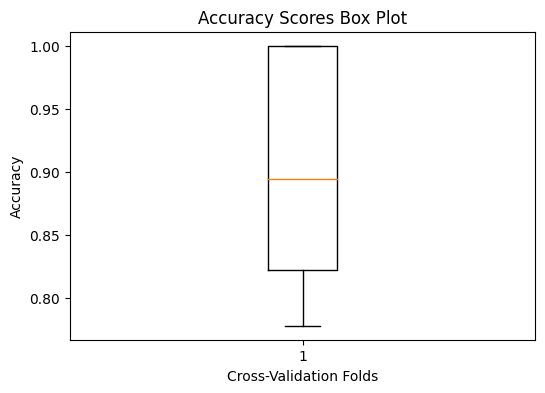

In [116]:
# Create a box plot for accuracy scores
plt.figure(figsize=(6, 4))
plt.boxplot(accuracy_scores)
plt.title("Accuracy Scores Box Plot")
plt.xlabel("Cross-Validation Folds")
plt.ylabel("Accuracy")
plt.show()


#Taking 50 Featueres

In [117]:
X = df_48.iloc[:, 0:50]  # Select columns from index 0 to 20 (exclusive)
y = df_48['histological_type']

In [118]:
# Initialize KFold with 10 folds
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store evaluation metrics for each fold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Initialize the random forest model
classifier = RandomForestClassifier()

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split


for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model to the training data
    classifier.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = classifier.predict(X_test)

    # Evaluate the model's performance for this fold
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))


# Calculate mean and standard deviation of evaluation metrics
mean_accuracy = np.mean(accuracy_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_f1 = np.mean(f1_scores)

std_accuracy = np.std(accuracy_scores)
std_precision = np.std(precision_scores)
std_recall = np.std(recall_scores)
std_f1 = np.std(f1_scores)

# Print the mean and standard deviation of evaluation metrics
print(f'Mean Accuracy: {mean_accuracy:.4f} (±{std_accuracy:.4f})')
print(f'Mean Precision: {mean_precision:.4f} (±{std_precision:.4f})')
print(f'Mean Recall: {mean_recall:.4f} (±{std_recall:.4f})')
print(f'Mean F1-score: {mean_f1:.4f} (±{std_f1:.4f})')

Mean Accuracy: 0.9067 (±0.0864)
Mean Precision: 0.9175 (±0.1541)
Mean Recall: 0.9262 (±0.1169)
Mean F1-score: 0.9065 (±0.1021)


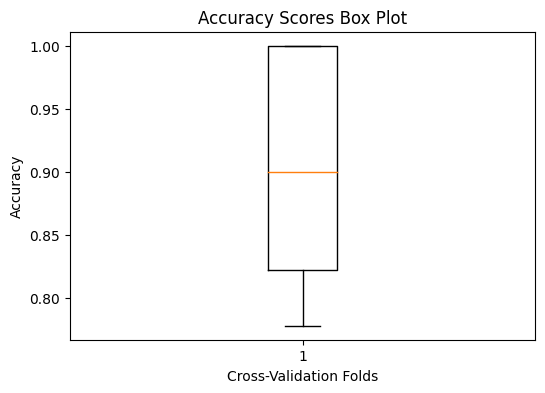

In [119]:
# Create a box plot for accuracy scores
plt.figure(figsize=(6, 4))
plt.boxplot(accuracy_scores)
plt.title("Accuracy Scores Box Plot")
plt.xlabel("Cross-Validation Folds")
plt.ylabel("Accuracy")
plt.show()


#Taking 100 Featueres

In [120]:
X = df_48.iloc[:, 0:100]  # Select columns from index 0 to 20 (exclusive)
y = df_48['histological_type']

In [121]:
# Initialize KFold with 10 folds
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store evaluation metrics for each fold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Initialize the random forest model
classifier = RandomForestClassifier()

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split


for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model to the training data
    classifier.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = classifier.predict(X_test)

    # Evaluate the model's performance for this fold
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))


# Calculate mean and standard deviation of evaluation metrics
mean_accuracy = np.mean(accuracy_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_f1 = np.mean(f1_scores)

std_accuracy = np.std(accuracy_scores)
std_precision = np.std(precision_scores)
std_recall = np.std(recall_scores)
std_f1 = np.std(f1_scores)

# Print the mean and standard deviation of evaluation metrics
print(f'Mean Accuracy: {mean_accuracy:.4f} (±{std_accuracy:.4f})')
print(f'Mean Precision: {mean_precision:.4f} (±{std_precision:.4f})')
print(f'Mean Recall: {mean_recall:.4f} (±{std_recall:.4f})')
print(f'Mean F1-score: {mean_f1:.4f} (±{std_f1:.4f})')

Mean Accuracy: 0.9378 (±0.0952)
Mean Precision: 0.9500 (±0.1500)
Mean Recall: 0.9429 (±0.1143)
Mean F1-score: 0.9333 (±0.1106)


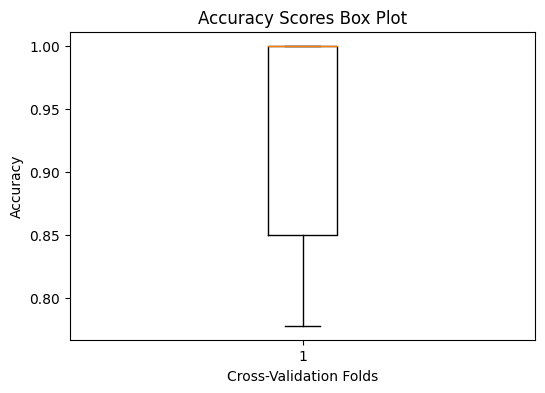

In [122]:
# Create a box plot for accuracy scores
plt.figure(figsize=(6, 4))
plt.boxplot(accuracy_scores)
plt.title("Accuracy Scores Box Plot")
plt.xlabel("Cross-Validation Folds")
plt.ylabel("Accuracy")
plt.show()


#Taking 200 Featueres

In [123]:
X = df_48.iloc[:, 0:200]  # Select columns from index 0 to 20 (exclusive)
y = df_48['histological_type']

In [124]:
# Initialize KFold with 10 folds
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store evaluation metrics for each fold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Initialize the random forest model
classifier = RandomForestClassifier()

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split


for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model to the training data
    classifier.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = classifier.predict(X_test)

    # Evaluate the model's performance for this fold
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))


# Calculate mean and standard deviation of evaluation metrics
mean_accuracy = np.mean(accuracy_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_f1 = np.mean(f1_scores)

std_accuracy = np.std(accuracy_scores)
std_precision = np.std(precision_scores)
std_recall = np.std(recall_scores)
std_f1 = np.std(f1_scores)

# Print the mean and standard deviation of evaluation metrics
print(f'Mean Accuracy: {mean_accuracy:.4f} (±{std_accuracy:.4f})')
print(f'Mean Precision: {mean_precision:.4f} (±{std_precision:.4f})')
print(f'Mean Recall: {mean_recall:.4f} (±{std_recall:.4f})')
print(f'Mean F1-score: {mean_f1:.4f} (±{std_f1:.4f})')

Mean Accuracy: 0.9589 (±0.0674)
Mean Precision: 0.9667 (±0.1000)
Mean Recall: 0.9571 (±0.0915)
Mean F1-score: 0.9556 (±0.0735)


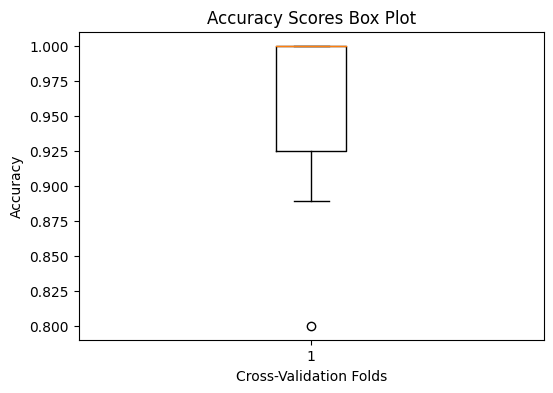

In [125]:
# Create a box plot for accuracy scores
plt.figure(figsize=(6, 4))
plt.boxplot(accuracy_scores)
plt.title("Accuracy Scores Box Plot")
plt.xlabel("Cross-Validation Folds")
plt.ylabel("Accuracy")
plt.show()
